# <center>AI SATURDAYS DONOSTIA 2020<center>
    
## <center>Regresión Indicador "DeprRate" (Índice de Depresión)</center>
    
## <center>Proyecto Práctico Equipo FACEMOOD</center>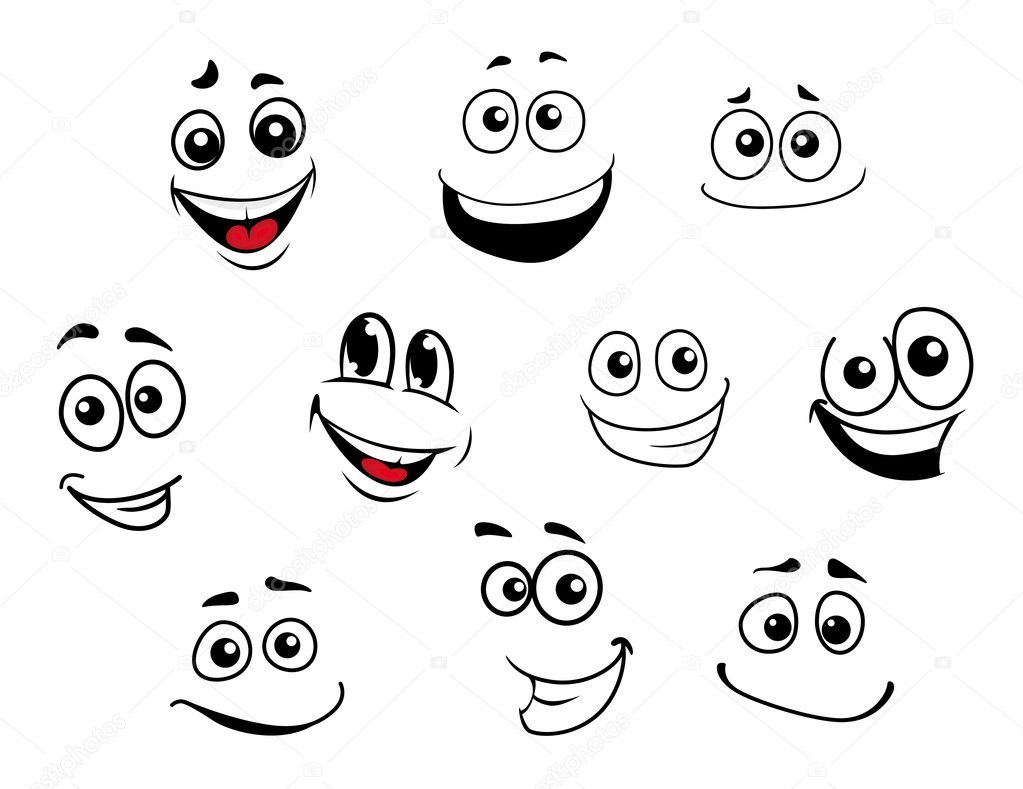    


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from regresion_functions import *
%load_ext autoreload
%autoreload 2

### Conjunto de Datos Original

In [2]:
df = pd.read_csv('../processed-data/tidy_socialmedia_data.csv', index_col=0)
df.drop('full_count', axis=1, inplace=True)
df.head()

,Participant,Date,Day,Time,Session.Name,Notification.No,LifePak.Download.No,Responded,Completed.Session,Session.Instance,...,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU
1,115091,2017-05-02,Tuesday,10:00:06,Daily questions,1,1,1,1,1.0,...,55.0,61.0,64.0,68.0,50.0,56.0,73.0,66.0,39.0,38.0
2,115091,2017-05-02,Tuesday,12:02:48,Daily questions,2,1,1,1,2.0,...,59.0,57.0,70.0,58.0,37.0,56.0,67.0,0.0,27.0,23.0
3,115091,2017-05-02,Tuesday,14:03:02,Daily questions,3,1,1,1,3.0,...,20.0,44.0,70.0,67.0,26.0,38.0,39.0,63.0,34.0,36.0
4,115091,2017-05-02,Tuesday,16:34:28,Daily questions,4,1,1,1,4.0,...,25.0,56.0,79.0,89.0,30.0,20.0,60.0,67.0,29.0,23.0
6,115091,2017-05-02,Tuesday,20:02:12,Daily questions,6,1,1,1,5.0,...,22.0,0.0,27.0,83.0,15.0,3.0,25.0,16.0,0.0,0.0


### Creación Índice de Depresión

In [3]:
df["DeprRate"]=(df["LowMood"]+df["LossOfInt"]+df["Hopeless"])/3
df.head()

,Participant,Date,Day,Time,Session.Name,Notification.No,LifePak.Download.No,Responded,Completed.Session,Session.Instance,...,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU,DeprRate
1,115091,2017-05-02,Tuesday,10:00:06,Daily questions,1,1,1,1,1.0,...,61.0,64.0,68.0,50.0,56.0,73.0,66.0,39.0,38.0,59.666667
2,115091,2017-05-02,Tuesday,12:02:48,Daily questions,2,1,1,1,2.0,...,57.0,70.0,58.0,37.0,56.0,67.0,0.0,27.0,23.0,57.666667
3,115091,2017-05-02,Tuesday,14:03:02,Daily questions,3,1,1,1,3.0,...,44.0,70.0,67.0,26.0,38.0,39.0,63.0,34.0,36.0,41.666667
4,115091,2017-05-02,Tuesday,16:34:28,Daily questions,4,1,1,1,4.0,...,56.0,79.0,89.0,30.0,20.0,60.0,67.0,29.0,23.0,44.666667
6,115091,2017-05-02,Tuesday,20:02:12,Daily questions,6,1,1,1,5.0,...,0.0,27.0,83.0,15.0,3.0,25.0,16.0,0.0,0.0,36.000000


### Nuevo Conjunto de Datos

In [4]:
df2 = df[["Participant","DeprRate","Fatigue", "Loneliness", "Concentrat", "Inferior", "Stress", "PSMU", "News", "ASMU"]]
print(df2.head())
print("No. Filas/Columnas del Conjunto de Datos: {}".format(df2.shape))

   Participant   DeprRate  Fatigue  Loneliness  Concentrat  Inferior  Stress  \
1       115091  59.666667     61.0        61.0        64.0      50.0    73.0   
2       115091  57.666667     28.0        57.0        70.0      37.0    67.0   
3       115091  41.666667     24.0        44.0        70.0      26.0    39.0   
4       115091  44.666667     63.0        56.0        79.0      30.0    60.0   
6       115091  36.000000     16.0         0.0        27.0      15.0    25.0   

   PSMU  News  ASMU  
1  66.0  39.0  38.0  
2   0.0  27.0  23.0  
3  63.0  34.0  36.0  
4  67.0  29.0  23.0  
6  16.0   0.0   0.0  
No. Filas/Columnas del Conjunto de Datos: (8687, 10)


### Estadísticas descriptivas

In [5]:
df2_2 = df[["DeprRate","Fatigue", "Loneliness", "Concentrat", "Inferior", "Stress", "PSMU", "News", "ASMU"]]
df2_2.describe()

,DeprRate,Fatigue,Loneliness,Concentrat,Inferior,Stress,PSMU,News,ASMU
count,8640.000000,8652.000000,8646.000000,8643.000000,8646.000000,8648.000000,8644.000000,8647.000000,8645.000000
mean,16.894985,36.987171,11.971085,26.389795,10.583854,20.639801,31.604350,20.804788,21.410642
std,16.338016,29.717460,16.962882,26.086166,15.485521,23.184786,29.214782,24.890481,25.321793
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.666667,10.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.333333,30.000000,5.000000,19.000000,3.000000,14.000000,24.000000,12.000000,12.000000
75%,25.666667,64.000000,18.000000,45.000000,17.000000,30.000000,61.000000,31.000000,33.000000
max,99.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### Medias por Participante

In [6]:
dfmean=df2.groupby('Participant').mean()
print(dfmean.head())
print("No. Filas/Columnas del Conjunto de Datos: {}".format(dfmean.shape))

              DeprRate    Fatigue  Loneliness  Concentrat   Inferior  \
Participant                                                            
115091       29.839827  45.155844   23.285714   37.272727  17.831169   
131183        6.129944  36.288136    0.389831   19.508475   0.254237   
438907       30.619048  51.040816   21.833333   35.729167  23.395833   
515070       13.076923  34.865385   14.076923   32.903846  11.403846   
572172       17.977273  18.272727    9.375000   14.352273  38.056818   

                Stress       PSMU       News       ASMU  
Participant                                              
115091       37.441558  32.883117  15.012987  16.792208  
131183       16.898305  45.203390  11.593220  28.254237  
438907       25.000000  44.595745  34.645833  27.040816  
515070       17.365385  25.711538  38.576923  37.826923  
572172       20.511364  36.852273  45.250000  40.545455  
No. Filas/Columnas del Conjunto de Datos: (125, 9)


### Estadísticas descriptivas de las medias por participante

In [7]:
dfmean.describe()

,DeprRate,Fatigue,Loneliness,Concentrat,Inferior,Stress,PSMU,News,ASMU
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,16.683777,37.066547,11.900892,26.568285,10.360674,20.555942,31.265974,20.329226,21.265517
std,10.882707,17.373640,11.066729,14.376593,10.527341,14.524215,14.071410,15.665447,15.387645
min,0.293860,0.802469,0.000000,0.474359,0.000000,0.180556,3.342857,0.308642,0.314815
25%,8.113924,24.202532,2.176471,15.574713,1.319149,8.222222,21.041667,6.705882,9.189189
50%,16.159204,38.150000,9.140625,25.810127,6.448276,19.634921,30.159420,16.566265,20.867647
75%,23.976190,49.244186,19.063492,35.333333,17.231884,32.277108,38.915493,31.017241,28.971831
max,51.952941,78.378947,53.788235,70.562500,52.658824,61.482353,75.413043,72.393939,77.863636


### Diagrama de Matriz para las Medias de las 9 Variables

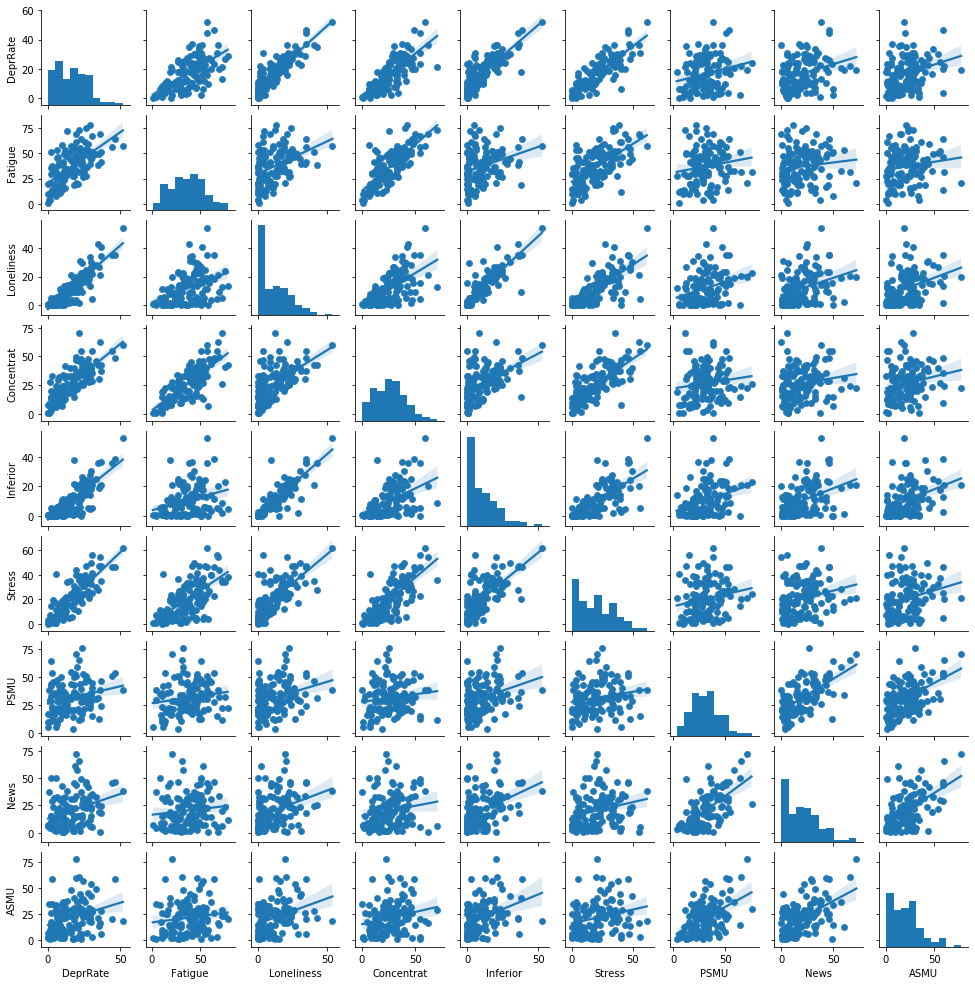

In [8]:
printMatrixDiagram(dfmean)   # Función definida en "regresion_functions"

### Correlaciones de Pearson para las Medias de las 9 Variables

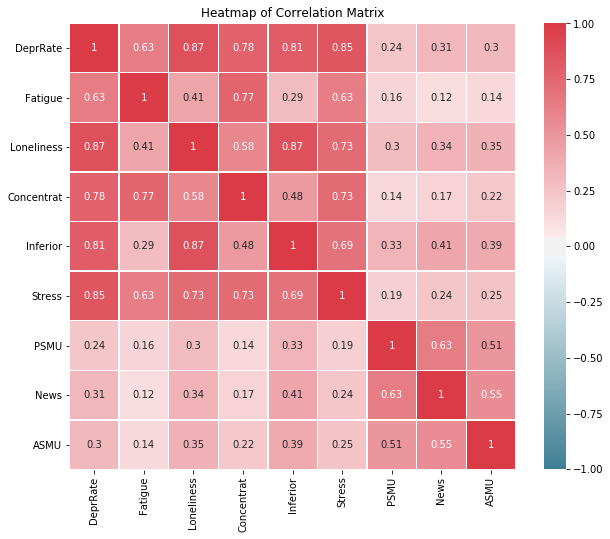

In [9]:
printPearsonCorrelations(dfmean)   # Función definida en "regresion_functions"

### Se observan correlaciones más significativas entre las siguientes variables:

DeprRate vs Loneliness

DeprRate vs Inferior

DeprRate vs Stress

Loneliness vs Inferior


No se observa "multicolinealidad"

### Regresión Lineal para las Medias: y = DeprRate, X = Demás Variables

In [10]:
label = dfmean.DeprRate

dfmean.drop('DeprRate', axis=1, inplace=True)

### Proceso de eliminación de variables X que no contribuyen significativamente para explicar y

In [11]:
resultsummary = pd.DataFrame(data={'iteration': [], 'intercept': [], 'RMSE_Training': [], 'RMSE_Testing': [],
                                   'R2_Training': [],'R2_Testing': [],'p_value_max':[],'removed_var':[]})

data_list_medias = calculateRegression(dfmean, label, resultsummary, alpha=0.15)   # Función definida en "regresion_functions"

   iteration  intercept  RMSE_Training  RMSE_Testing  R2_Training  R2_Testing  \
0        0.0      1.120          3.147         3.603        0.912       0.906   
1        1.0      0.981          3.162         3.544        0.911       0.909   
2        2.0      0.904          3.180         3.509        0.910       0.911   
3        3.0     -0.025          3.215         3.463        0.908       0.913   

   p_value_max removed_var  
0        0.431        ASMU  
1        0.354        News  
2        0.254        PSMU  
3        0.048           -  

Modelo Final
['Fatigue', 'Loneliness', 'Concentrat', 'Inferior', 'Stress']
[0.05943105 0.30838329 0.19015895 0.24959075 0.15386817] -0.024589409378929616
RMSE of Linear Regression Model with Training Data: 3.22
RMSE of Linear Regression Model with Testing Data: 3.46
R2 Coefficient for Linear Regression Model with Training Data: 0.908
R2 Coefficient for Linear Regression Model with Testing Data: 0.913


### Análisis de Residuos Modelo Final

Estadística prueba normalidad Kolmogorov-Smirnov=0.090, pvalue=0.368

Probablemente Normal


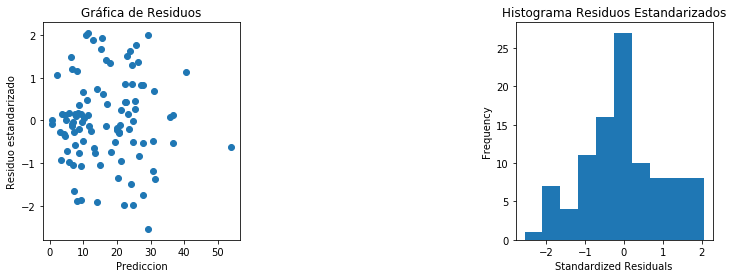

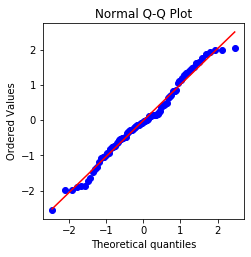

In [12]:
fitt = data_list_medias[5]
standardized_residuals = data_list_medias[4]

residualAnalysis(fitt, standardized_residuals)   # Función definida en "regresion_functions"

## Conclusión Final Modelo Ajustado (y = DeprRate)
####  
### El coeficiente de determinación (R2) del modelo ajustado para las "medias" es alto (91,3%).
### Como el Análisis de Residuos también ha sido considerado satisfactorio, se valida el modelo bajo un punto de vista estadístico.
####  
### DeprRate = -0,025 + 0,31 Loneliness + 0,25 Inferior + 0,19 Concentrat + 0,15 Stress  + 0,06 Fatigue